In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx


In [2]:
sns.set_style("darkgrid")
# plt.style.context(matplotx.styles.duftify(matplotx.styles.dracula))


In [3]:
data = pd.read_csv("./ParetoRankCSV/combined_data_pareto.csv")
data
# data = pd.read_csv("combined_data.csv")
# data.head()

,Protein,Strain Energy Cutoff,EF1%,EF5%,deltaEF1%,deltaEF5%,Linear Log10 AUC (x10),Delta Linear Log10 AUC (x10),ROC_AUC,Actives,Total Count,deltaAUC
0,CCR5,No Cutoff,2.439024,3.902439,0.000000,0.000000,1.343819,0.000000,0.483312,205.0,10379.0,0.000000
1,CCR5,4,4.166667,4.166667,1.727642,0.264228,1.291297,-0.052522,0.499054,24.0,2756.0,0.015742
2,CCR5,4.5,2.380952,2.380952,-0.058072,-1.521487,1.218683,-0.125136,0.498375,42.0,3455.0,0.015062
3,CCR5,5.0,5.084746,8.474576,2.645721,4.572137,1.461704,0.117885,0.528920,59.0,4167.0,0.045608
4,CCR5,5.5,4.166667,8.333333,1.727642,4.430894,1.491911,0.148092,0.530043,72.0,4843.0,0.046730
...,...,...,...,...,...,...,...,...,...,...,...,...
523,DRD3,ParetoRank,NaN,NaN,NaN,NaN,1.801391,0.785344,0.605451,NaN,NaN,0.178781
524,S1PR1,ParetoRank,NaN,NaN,NaN,NaN,0.729989,-2.403990,0.321451,NaN,NaN,-0.478859
525,PAR1,ParetoRank,NaN,NaN,NaN,NaN,0.992029,-3.705993,0.320299,NaN,NaN,-0.474840
526,OPRD,ParetoRank,NaN,NaN,NaN,NaN,1.921628,0.709524,0.570096,NaN,NaN,0.151229


In [4]:
# Grouping the data by 'Strain Energy Cutoff' and calculating the mean of the delta values
grouped_data = (
    data.groupby("Strain Energy Cutoff")[
        ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
    ]
    .mean()
    .reset_index()
)

# Display the grouped data
grouped_data


,Strain Energy Cutoff,deltaEF1%,deltaEF5%,Delta Linear Log10 AUC (x10),deltaAUC
0,4,3.329048,3.798820,0.276792,0.004221
1,4.5,2.969755,4.712234,0.276897,0.005854
2,5.0,3.505321,4.844102,0.274446,0.008675
3,5.5,3.277046,4.362139,0.276362,0.011447
4,6.0,2.521180,3.621786,0.217107,0.011224
5,7.0,2.047371,1.780524,0.131338,0.006199
6,7.5,1.685517,1.238911,0.094558,0.003904
7,8.0,1.110864,0.992509,0.080210,0.003724
8,No Cutoff,0.000000,0.000000,0.000000,0.000000
9,ParetoRank,NaN,NaN,-1.340770,-0.201186


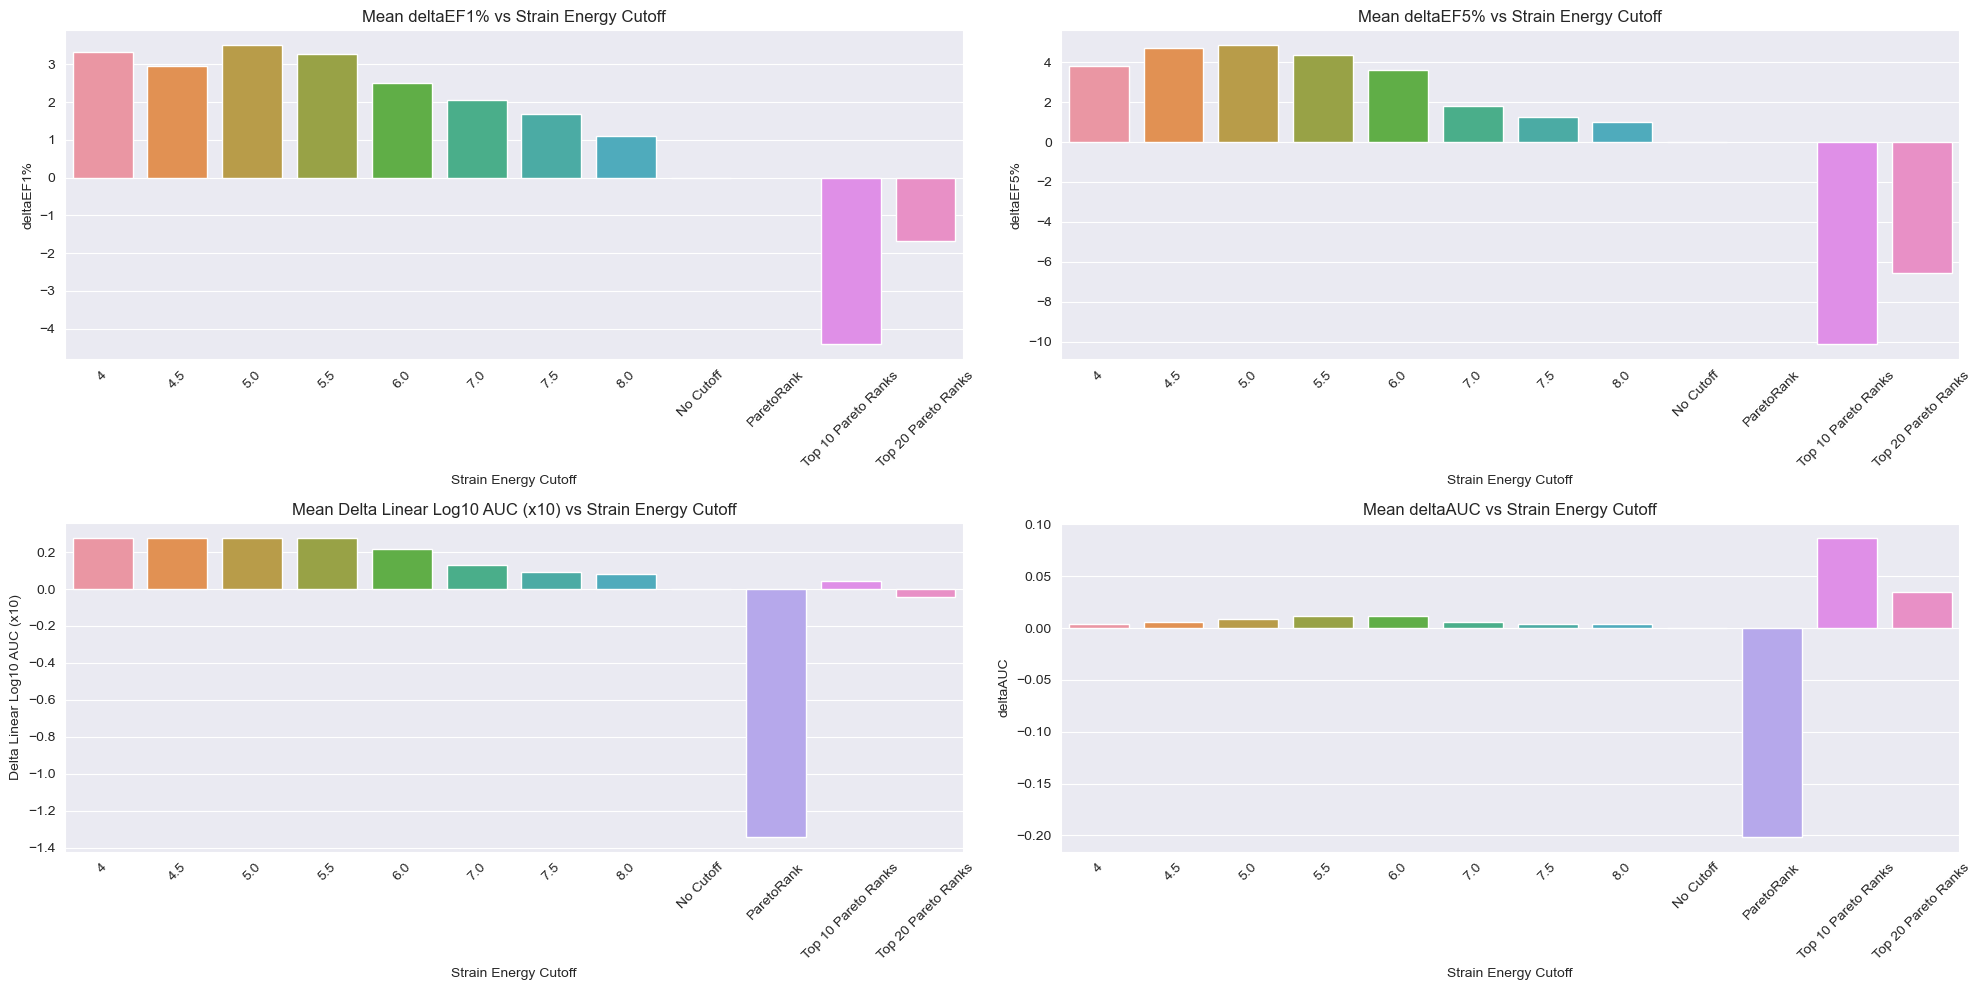

In [5]:
# for index, item_indexed in enumerate tracks the index and the item at that index
# here we are iterating over the columns of the grouped data
plt.figure(figsize=(20, 10))
for i, column in enumerate(
    ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"], 1
):
    plt.subplot(2, 2, i)
    sns.barplot(
        x="Strain Energy Cutoff",
        y=column,
        data=grouped_data,
    )
    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.title(f"Mean {column} vs Strain Energy Cutoff")

plt.tight_layout()
plt.show()


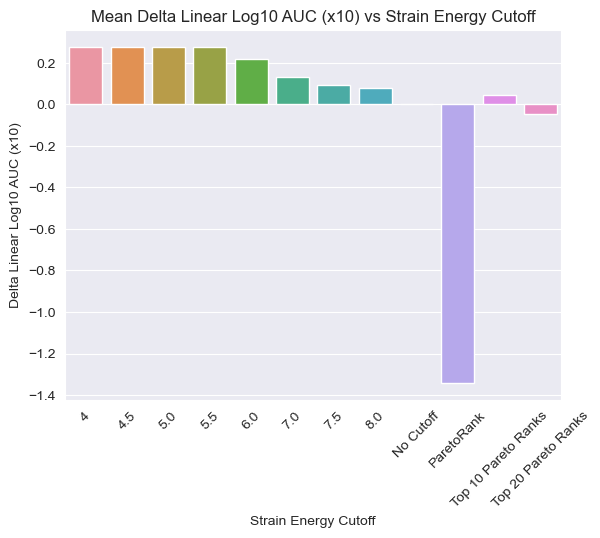

In [6]:
sns.barplot(
    x="Strain Energy Cutoff", y="Delta Linear Log10 AUC (x10)", data=grouped_data
)
plt.title("Mean Delta Linear Log10 AUC (x10) vs Strain Energy Cutoff")
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("Delta Linear Log10 AUC (x10)")
plt.xticks(rotation=45)
plt.show()


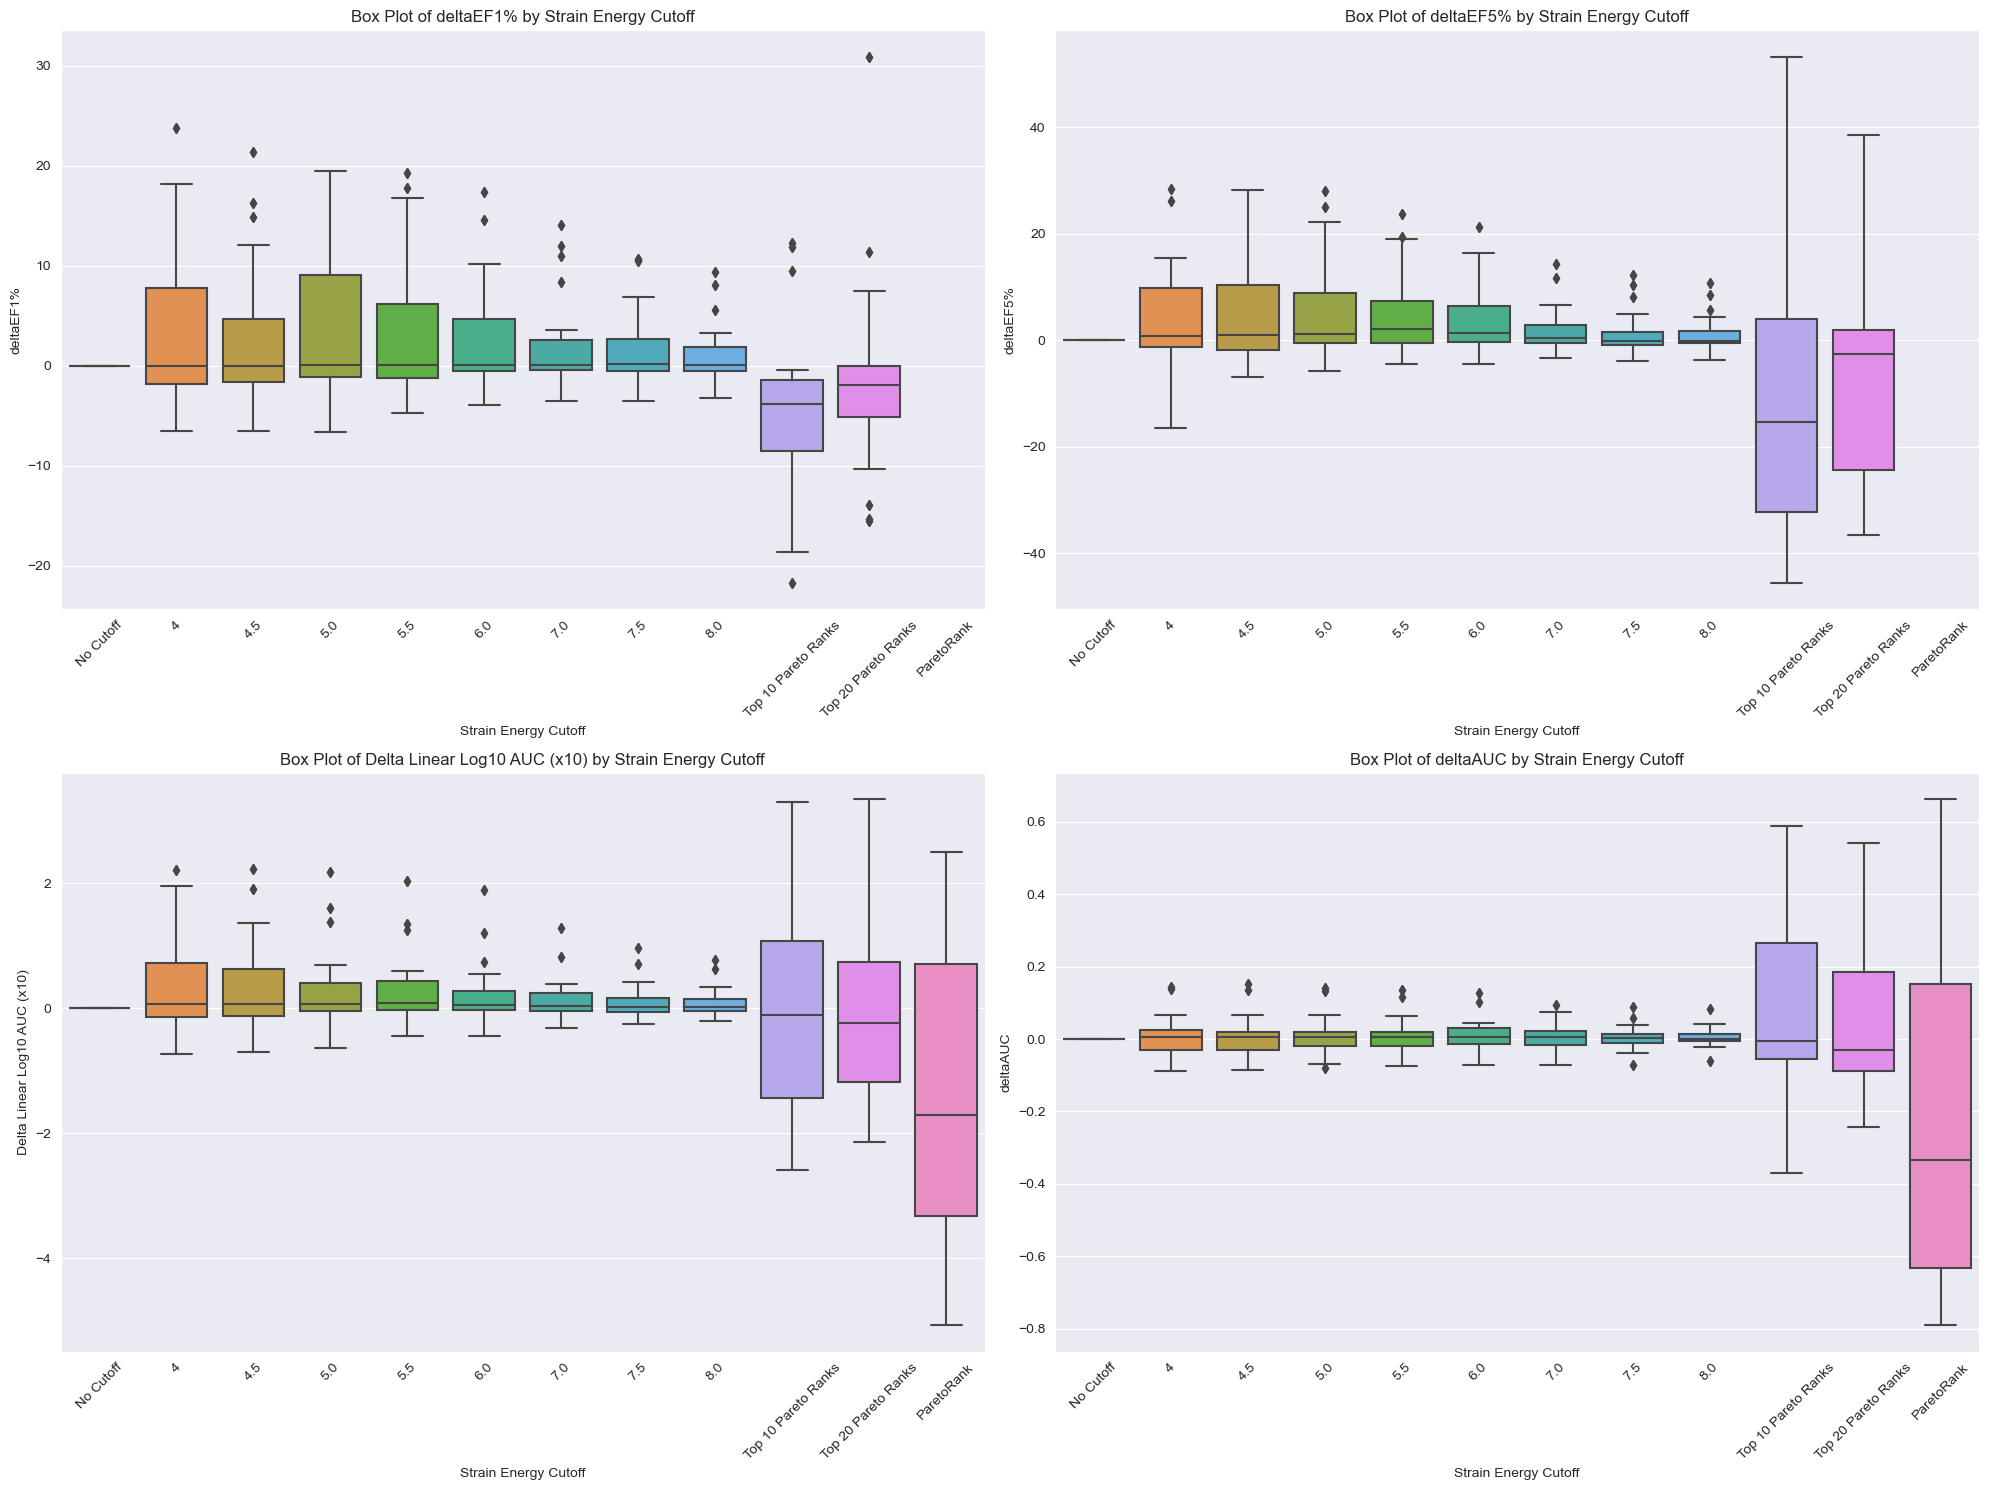

In [7]:
plt.figure(figsize=(20, 15))

# Define the metrics to plot
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]

# Creating box plots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Strain Energy Cutoff", y=metric, data=data)
    plt.xticks(rotation=45)
    plt.title(f"Box Plot of {metric} by Strain Energy Cutoff")

# Adjust layout
plt.tight_layout()

# Show the plots without legends
plt.show()


/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/201334717.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_4_data, ci=None)


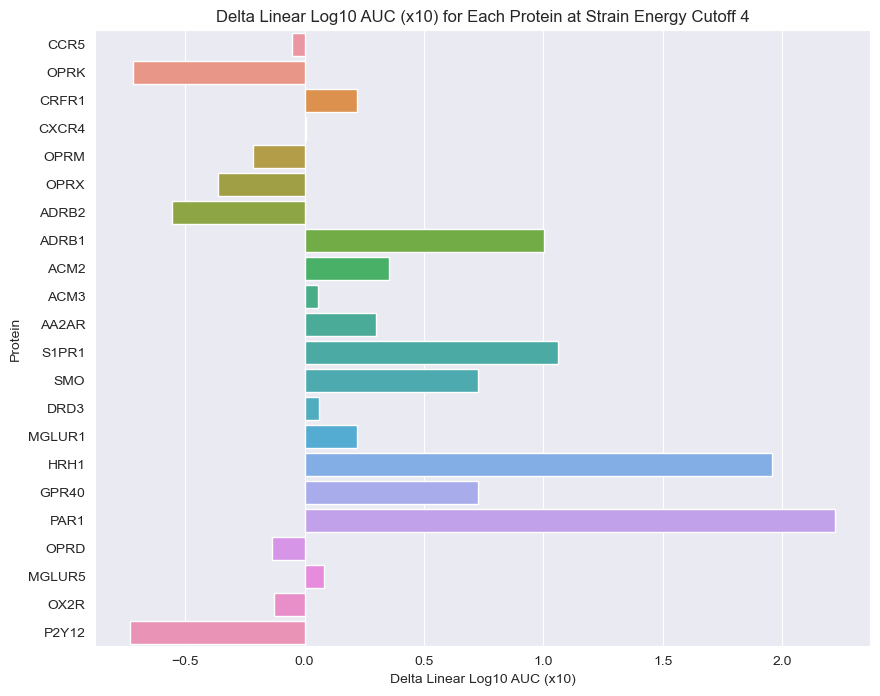

In [8]:
# Filter the dataset for strain energy cutoff of 4
cutoff_4_data = data[data["Strain Energy Cutoff"] == "4"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_4_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 4")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()


In [9]:
data.columns


Index(['Protein', 'Strain Energy Cutoff', 'EF1%', 'EF5%', 'deltaEF1%',
       'deltaEF5%', 'Linear Log10 AUC (x10)', 'Delta Linear Log10 AUC (x10)',
       'ROC_AUC', 'Actives', 'Total Count', 'deltaAUC'],
      dtype='object')

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/1110256762.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_4_data, ci=None)


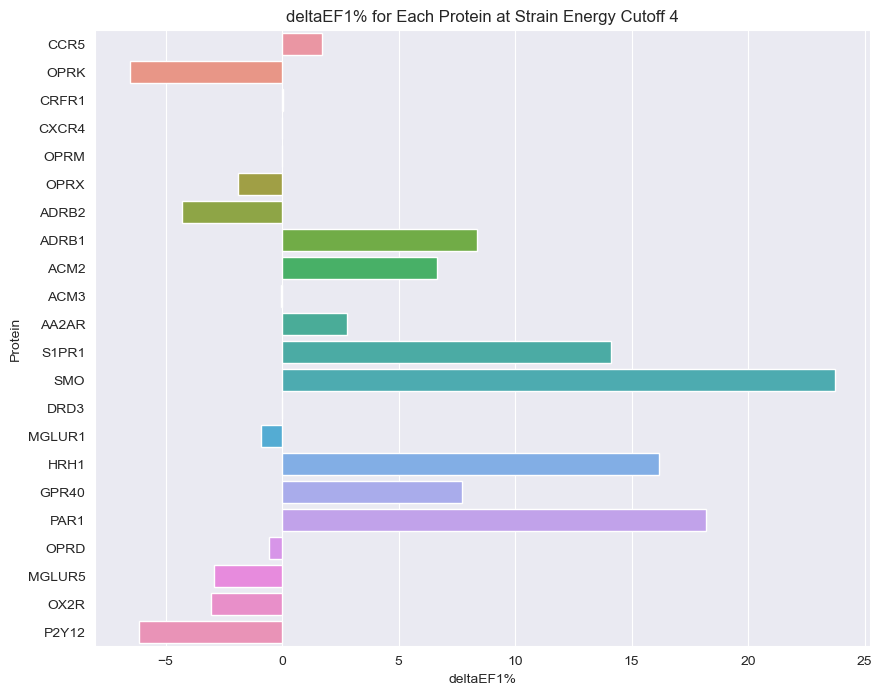

In [10]:
# Create a barplot plot of deltaEF1% for cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_4_data, ci=None)
plt.title("deltaEF1% for Each Protein at Strain Energy Cutoff 4")
plt.xlabel("deltaEF1%")
plt.ylabel("Protein")

plt.show()



/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/3374041000.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_4_data, ci=None)


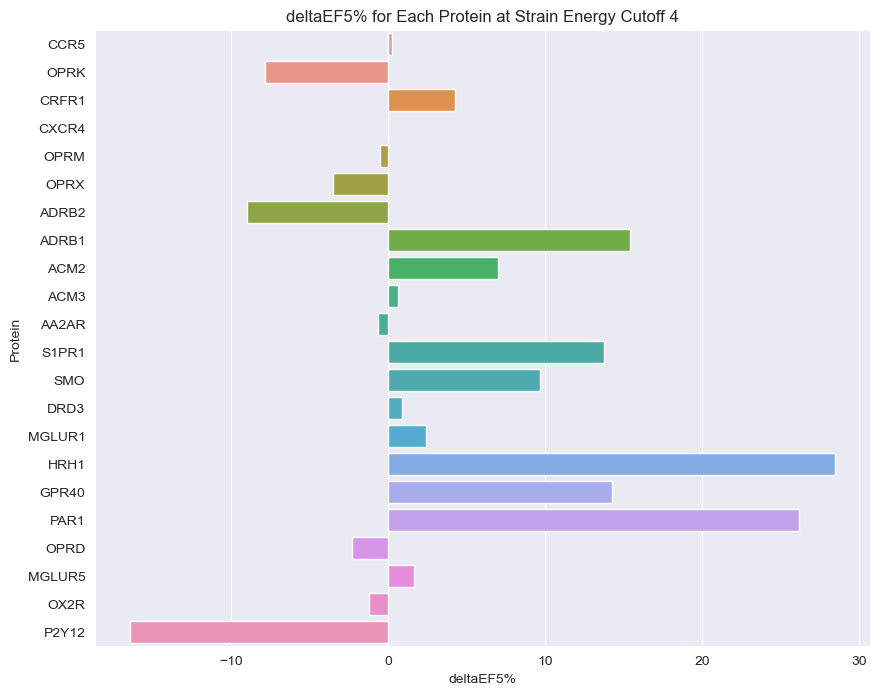

In [11]:
# Create a barplot plot of deltaEF5% for cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_4_data, ci=None)
plt.title("deltaEF5% for Each Protein at Strain Energy Cutoff 4")
plt.xlabel("deltaEF5%")
plt.ylabel("Protein")

plt.show()


/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/3466769854.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)


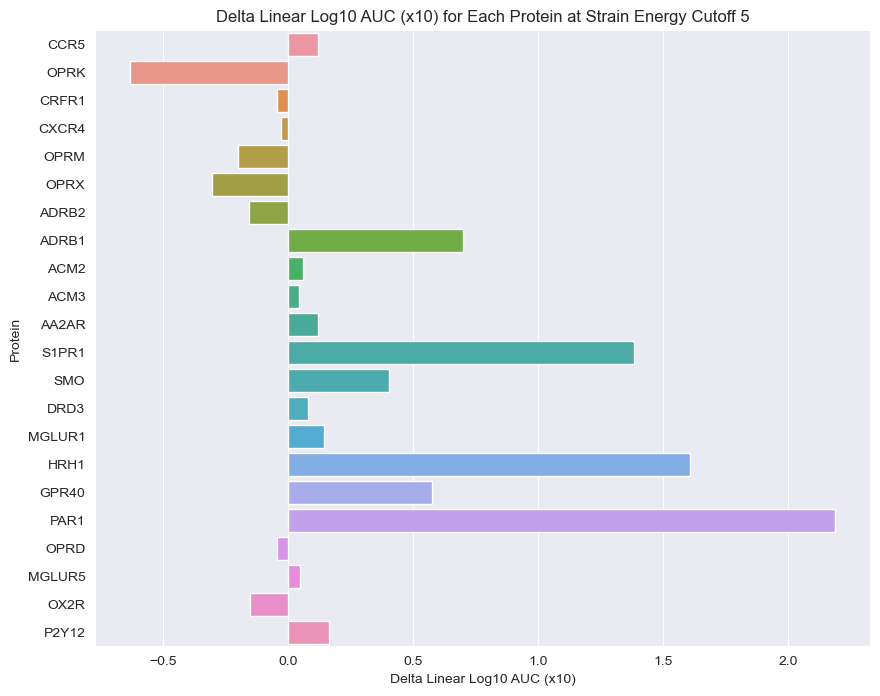

In [12]:
# filter the data for strain energy cut off of 5.0
cutoff_5_data = data[data["Strain Energy Cutoff"] == "5.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()



/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/745787315.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_5_data, ci=None)


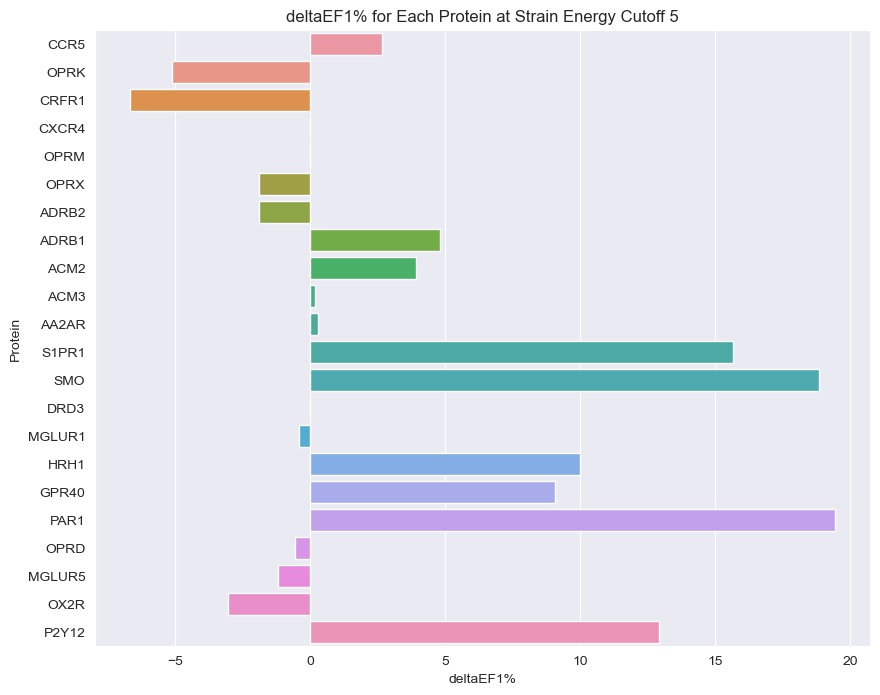

In [13]:
# Create a barplot plot of deltaEF1% for cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_5_data, ci=None)
plt.title("deltaEF1% for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("deltaEF1%")
plt.ylabel("Protein")

plt.show()


/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/2617427268.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_5_data, ci=None)


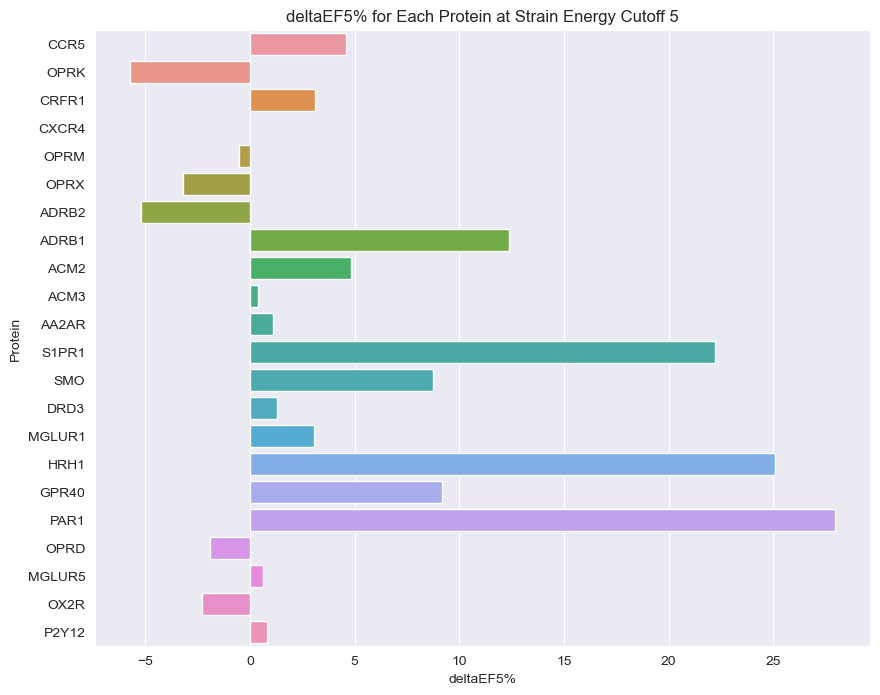

In [14]:
# Create a barplot plot of deltaEF5% for cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_5_data, ci=None)
plt.title("deltaEF5% for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("deltaEF5%")
plt.ylabel("Protein")

plt.show()


/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_22461/2472719648.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_7_data, ci=None)


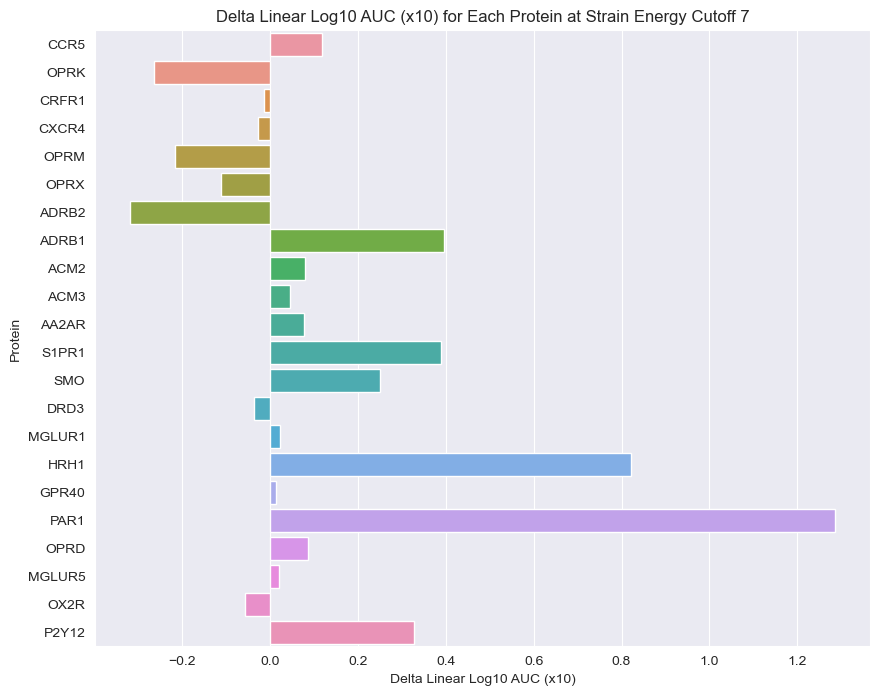

In [15]:
# filter the data for strain energy cut off of 7.0
cutoff_7_data = data[data["Strain Energy Cutoff"] == "7.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_7_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 7")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()
